In [4]:
#Data frames
import pandas as pd
#Operações matemáticas
import numpy as np
#Implementações de Machine Learning
import sklearn as sk
#Plotting para visualizar resultados
import matplotlib.pyplot as plt
#Divisão do Dataframe em pastas
from sklearn.model_selection import KFold 
#Mostrar gráficos do matplotlib no notebook
%matplotlib inline

# Exercício 1
## Holdout cross validation

In [5]:
#Importa dados
raw_data = pd.read_csv('class01.csv')
#Separa dataframe em Target e Dados
target = raw_data['target']
data = raw_data.loc[:,'x0':'x99']

In [6]:
data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,1.162990,-0.831971,-0.185266,0.441240,0.033957,1.432988,-1.171483,0.203248,1.900889,1.119174,...,-1.130117,-1.139286,-0.608239,-0.107224,1.700972,-0.698151,0.520004,-0.450784,-0.187694,-0.538329
1,-1.750976,-0.516614,-0.761588,1.692347,-1.579436,0.581782,-0.950953,0.381426,-1.370027,0.943387,...,1.119688,-0.280502,-0.306014,0.554926,-1.402866,-0.776478,1.181890,-0.066449,-0.802430,1.587229
2,0.304635,0.972369,0.202908,-0.607761,0.487088,0.205173,0.815216,0.491880,0.904705,1.167017,...,0.580494,-0.134901,0.291496,-1.038477,1.297057,-1.296614,-1.109806,-0.003495,-0.149940,0.539892
3,-1.667576,-0.262639,-1.513473,-1.060125,-0.456209,1.782235,1.034366,0.115217,-0.182177,-1.007720,...,2.236321,1.203067,0.082647,-1.625862,-0.154116,0.478483,-1.465050,-0.450510,-0.757631,-3.184493
4,-0.820670,0.390631,0.761628,-0.945407,-0.871003,-0.142293,-1.522004,0.141962,0.091094,-0.860818,...,-1.891811,1.955541,0.079445,0.528177,1.522003,1.849394,-1.194590,1.023761,-0.335391,2.448868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.164757,1.329301,-0.680700,0.481780,0.561817,0.204485,-0.350778,-0.197713,-0.745026,0.718480,...,1.064962,1.743430,0.446207,0.876814,0.998675,-1.282721,0.482330,-1.187134,0.066245,0.055418
996,0.568838,-2.067345,0.625788,-1.179648,-0.938698,0.240703,-1.496992,-0.155406,0.669622,0.527776,...,0.583822,-0.272457,1.943705,-0.624538,1.013829,-0.084319,-0.207220,-1.655624,-0.800987,-0.447281
997,-2.760697,1.777879,-0.206742,0.509796,0.731735,-0.460887,0.649498,-0.754431,-0.954591,2.586772,...,-0.683561,0.145727,-1.491027,-0.135342,2.061592,-1.806083,1.187043,-0.015773,0.503704,1.009352
998,1.223708,-0.953064,0.627771,-0.610824,0.188281,-1.182401,0.001279,-1.302576,-1.786399,-1.897115,...,-0.811022,-0.334261,0.464170,-1.379745,-0.882279,5.061491,-0.934892,-1.682469,0.607128,2.693806


In [7]:
target

0      1.0
1      0.0
2      8.0
3      7.0
4      3.0
      ... 
995    6.0
996    7.0
997    9.0
998    4.0
999    3.0
Name: target, Length: 1000, dtype: float64

In [8]:
raw_data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,target
0,1.162990,-0.831971,-0.185266,0.441240,0.033957,1.432988,-1.171483,0.203248,1.900889,1.119174,...,-1.139286,-0.608239,-0.107224,1.700972,-0.698151,0.520004,-0.450784,-0.187694,-0.538329,1.0
1,-1.750976,-0.516614,-0.761588,1.692347,-1.579436,0.581782,-0.950953,0.381426,-1.370027,0.943387,...,-0.280502,-0.306014,0.554926,-1.402866,-0.776478,1.181890,-0.066449,-0.802430,1.587229,0.0
2,0.304635,0.972369,0.202908,-0.607761,0.487088,0.205173,0.815216,0.491880,0.904705,1.167017,...,-0.134901,0.291496,-1.038477,1.297057,-1.296614,-1.109806,-0.003495,-0.149940,0.539892,8.0
3,-1.667576,-0.262639,-1.513473,-1.060125,-0.456209,1.782235,1.034366,0.115217,-0.182177,-1.007720,...,1.203067,0.082647,-1.625862,-0.154116,0.478483,-1.465050,-0.450510,-0.757631,-3.184493,7.0
4,-0.820670,0.390631,0.761628,-0.945407,-0.871003,-0.142293,-1.522004,0.141962,0.091094,-0.860818,...,1.955541,0.079445,0.528177,1.522003,1.849394,-1.194590,1.023761,-0.335391,2.448868,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.164757,1.329301,-0.680700,0.481780,0.561817,0.204485,-0.350778,-0.197713,-0.745026,0.718480,...,1.743430,0.446207,0.876814,0.998675,-1.282721,0.482330,-1.187134,0.066245,0.055418,6.0
996,0.568838,-2.067345,0.625788,-1.179648,-0.938698,0.240703,-1.496992,-0.155406,0.669622,0.527776,...,-0.272457,1.943705,-0.624538,1.013829,-0.084319,-0.207220,-1.655624,-0.800987,-0.447281,7.0
997,-2.760697,1.777879,-0.206742,0.509796,0.731735,-0.460887,0.649498,-0.754431,-0.954591,2.586772,...,0.145727,-1.491027,-0.135342,2.061592,-1.806083,1.187043,-0.015773,0.503704,1.009352,9.0
998,1.223708,-0.953064,0.627771,-0.610824,0.188281,-1.182401,0.001279,-1.302576,-1.786399,-1.897115,...,-0.334261,0.464170,-1.379745,-0.882279,5.061491,-0.934892,-1.682469,0.607128,2.693806,4.0


Notamos então que há $1000$ dados com $100$ features cada.

In [4]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(data.iloc[0:350,], target.iloc[0:350])

train_accuracy = sk.metrics.accuracy_score(target.iloc[0:350], nb.predict(data.iloc[0:350]))
test_accuracy = sk.metrics.accuracy_score(target.iloc[350:1000], nb.predict(data.iloc[350:1000]))


In [5]:
print(train_accuracy)
print(test_accuracy)

0.76
0.6276923076923077


Logo, a acurácia média de treinamento foi $0.76$, e a acurácia média de teste foi $0.63$.

## Leave one out

In [ ]:
#Cria função para iterar o dataframe em pastas
folds1000 = KFold(n_splits=1000)
folds1000.get_n_splits(raw_data)
train_accuracy = []
test_accuracy = []
for train_index, test_index in folds1000.split(raw_data):
    nb = GaussianNB()
    nb.fit(data.iloc[train_index], target.iloc[train_index])
    
    train_accuracy.append(sk.metrics.accuracy_score(target.iloc[train_index], nb.predict(data.iloc[train_index])))
    test_accuracy.append(sk.metrics.accuracy_score(target.iloc[test_index], nb.predict(data.iloc[test_index])))

In [ ]:
print("Average test accuracy: ", np.mean(test_accuracy))
print("Average train accuracy: ", np.mean(train_accuracy))

In [ ]:
#Plota acurácia de treinamento e teste para cada modelo
plt.plot(range(len(test_accuracy)), test_accuracy, label = "Test")
plt.plot(range(len(test_accuracy)), train_accuracy,label = "Train")
#plt.ylim([0.5,1])
plt.legend()
plt.show()
#isso foi uma má ideia

Logo, a acurácia média de treinamento foi $0.69$, e a acurácia média de teste foi $0.64$.

In [ ]:
#Plota acurácia de treinamento para cada modelo
plt.plot(range(len(test_accuracy)), train_accuracy,label = "Train")
plt.legend()
plt.show()

# Exercício 2

In [6]:
#Importa dados
raw_data = pd.read_csv('class02.csv')
#Separa dataframe em Target e Dados
target = raw_data['target']
data = raw_data.loc[:,'x0':'x99']

In [7]:
data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,1.753916,-1.283809,-0.474435,-0.328502,1.162749,1.110096,-0.532774,1.041946,0.393644,1.508894,...,-2.287802,-0.102623,0.233644,-1.711628,0.816312,2.700492,2.813359,0.343391,0.348734,-0.269752
1,0.579139,0.499696,1.848421,-2.037663,-0.490755,-0.874975,0.988246,0.117195,0.641343,1.041325,...,-1.049899,-0.113718,0.918633,1.212413,2.534996,-1.694515,-2.519081,0.531062,-0.429925,-1.033625
2,3.455631,-0.843593,-1.180263,-1.388971,-0.763881,-0.809791,-0.225052,0.818787,1.021153,-0.486736,...,-1.526304,-0.812184,-0.677958,2.545184,2.228583,-1.911287,-3.965635,1.293003,0.196379,-0.739823
3,2.917033,-1.369227,1.312688,-0.445185,0.218093,1.990030,-1.176665,-0.116772,1.242437,0.100773,...,-0.910900,-1.691702,-1.903862,-0.437867,-0.542272,1.104584,-1.132434,0.580519,0.953035,1.643271
4,1.565296,-0.072016,1.263672,0.926946,-1.769547,0.745731,0.977034,3.002904,1.847178,-1.132675,...,-4.443512,0.158105,3.591999,1.866443,1.930861,1.731162,-1.206966,-0.956707,-0.343488,1.194939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-0.483071,-0.785356,-1.473912,-0.364104,0.780808,-1.386196,-0.263644,-0.298184,-1.166411,0.299697,...,1.677904,0.043255,2.102650,-1.368926,-0.927241,0.181351,3.597447,-0.391641,0.055940,-1.468182
1496,0.707374,-0.139644,-1.857319,-0.071640,0.106124,-1.800184,-1.842034,-0.850754,0.247203,1.849963,...,-3.905002,-0.684966,-0.178195,-2.423397,-1.303005,3.681249,-5.299956,1.038735,1.080371,-0.162411
1497,-0.965895,0.369102,1.063720,0.905283,-1.553335,-0.645608,-1.676366,1.202036,-0.814033,-0.028269,...,-3.549987,-0.922081,-1.206221,-1.159822,-0.866549,3.829318,-0.691933,-1.865435,-0.280966,0.460343
1498,-0.281441,-0.108765,0.130838,-0.639957,-1.713153,1.122905,1.549358,0.472713,-1.898659,-0.150379,...,-1.412405,0.280581,0.761707,-1.035418,-1.072584,2.593633,0.769657,-1.048872,-0.377704,1.703311


Notamos então que há $1500$ dados com $100$ features cada. 

In [8]:
#importa classificador
from sklearn.neighbors import KNeighborsClassifier

#Cria função para iterar o dataframe em pastas
folds5 = KFold(n_splits=5)
#folds5.get_n_splits(raw_data)

#Lista para armazenar acurácia
train_accuracy = []
test_accuracy = []

#Cria 5 modelos e realiza fitting e treinamento. 
for train_index, test_index in folds5.split(raw_data):
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(data.iloc[train_index], target.iloc[train_index])
    
    test_accuracy.append(sk.metrics.accuracy_score(target.iloc[test_index], knn.predict(data.iloc[test_index])))
    train_accuracy.append(sk.metrics.accuracy_score(target.iloc[train_index], knn.predict(data.iloc[train_index])))

print("Average test accuracy: ", np.mean(test_accuracy))
print("Average train accuracy: ", np.mean(train_accuracy))

Average test accuracy:  0.8386666666666667
Average train accuracy:  0.8661666666666668


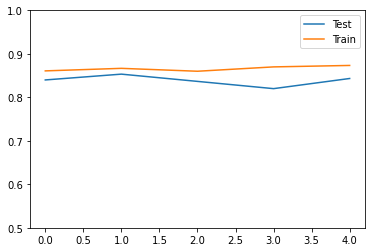

In [9]:
#Plota acurácia de treinamento e teste para cada modelo
plt.plot(range(5), test_accuracy, label = "Test")
plt.plot(range(5), train_accuracy, label = "Train")
plt.ylim([0.5,1])
plt.legend()
plt.show()

Logo, acurácia média de treinamento foi de $0.834$, enquanto que a acurácia média de teste foi de $0.871$.

# Exercício 3 

In [ ]:
#Importa dados
raw_data = pd.read_csv('reg01.csv')
#Separa dataframe em Target e Dados
target = raw_data['target']
data = raw_data.loc[:,'x0':'x9']

In [ ]:
raw_data

Logo, notamos que há $1000$ dados com $10$ features.

In [10]:
from sklearn.linear_model import Lasso

#Cria função para iterar o dataframe em pastas
folds1000 = KFold(n_splits=1000)
folds1000.get_n_splits(raw_data)
train_accuracy = []
test_accuracy = []

for train_index, test_index in folds1000.split(raw_data):
    lasso = Lasso()
    lasso.fit(data.iloc[train_index], target.iloc[train_index])
    
    train_accuracy.append(np.sqrt(sk.metrics.mean_squared_error(target.iloc[train_index], lasso.predict(data.iloc[train_index]))))
    test_accuracy.append(np.sqrt(sk.metrics.mean_squared_error(target.iloc[test_index], lasso.predict(data.iloc[test_index]))))
    
print("RMSE test: ", np.mean(test_accuracy))
print("RMSE train: ", np.mean(train_accuracy))

RMSE test:  1.490191477639301
RMSE train:  1.6667371228629582


In [ ]:
#Plota acurácia de treinamento e teste para cada modelo
plt.plot(range(len(test_accuracy)), test_accuracy, label = "Test")
plt.plot(range(len(test_accuracy)), train_accuracy,label = "Train")
#plt.ylim([0.5,1])
plt.legend()
plt.show()

In [ ]:
#Plota acurácia de treinamento para cada modelo
plt.plot(range(len(test_accuracy)), train_accuracy,label = "Train")
plt.legend()
plt.show()

Logo, RMSE para treinamento foi $19.22$, e RMSE para teste foi $15.46$.

# Exercício 4

In [ ]:
#Importa dados
raw_data = pd.read_csv('reg02.csv')
#Separa dataframe em Target e Dados
target = raw_data['target']
data = raw_data.loc[:,'x0':'x19']

In [ ]:
raw_data

Logo, notamos que há $1000$ dados com $20$ features.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

#Cria função para iterar o dataframe em pastas
folds5 = KFold(n_splits=5)
folds5.get_n_splits(raw_data)

#Lista para armazenar acurácia
train_accuracy = []
test_accuracy = []

#Cria 5 modelos e realiza fitting e treinamento. 
for train_index, test_index in folds5.split(raw_data):
    dtr = DecisionTreeRegressor()
    dtr.fit(data.iloc[train_index], target.iloc[train_index])
    
    test_accuracy.append(sk.metrics.mean_absolute_error(target.iloc[test_index], dtr.predict(data.iloc[test_index])))
    train_accuracy.append(sk.metrics.mean_absolute_error(target.iloc[train_index], dtr.predict(data.iloc[train_index])))

print("MSE test: ", np.mean(test_accuracy))
print("MSE train: ", np.mean(train_accuracy))

In [ ]:
#Plota acurácia de treinamento e teste para cada modelo
plt.plot(range(len(test_accuracy)), test_accuracy, label = "Test")
plt.plot(range(len(test_accuracy)), train_accuracy,label = "Train")
#plt.ylim([0.5,1])
plt.legend()
plt.show()

In [ ]:
#Plota acurácia de treinamento para cada modelo
plt.plot(range(len(test_accuracy)), train_accuracy,label = "Train")
plt.legend()
plt.show()

Logo, RMSE de treinamento foi $0$, e o RMSE de teste foi $43.24$.